In [1]:
import pandas as pd

In [2]:
df = df = pd.read_csv('../../Data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
to_select= ('engine-size', 'horsepower', 'highway-mpg', 'curb-weight')
to_select

('engine-size', 'horsepower', 'highway-mpg', 'curb-weight')

In [5]:
x = df.drop("price", axis=1)  
y = df['price']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [15]:
to_select = ['horsepower','curb-weight','engine-size','highway-mpg']
x_train = X_train[to_select].values
x_test = X_test[to_select].values


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_hat = model.predict(x_test)
y_hat[:5]

array([ 7011.91754831, 25545.80372293,  5976.30228949,  7884.34468685,
       13179.08303774])

In [20]:
model.intercept_

-6126.554647525638

In [21]:
model.coef_

array([  22.21002149,    3.45961207,   87.00770438, -102.18020658])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

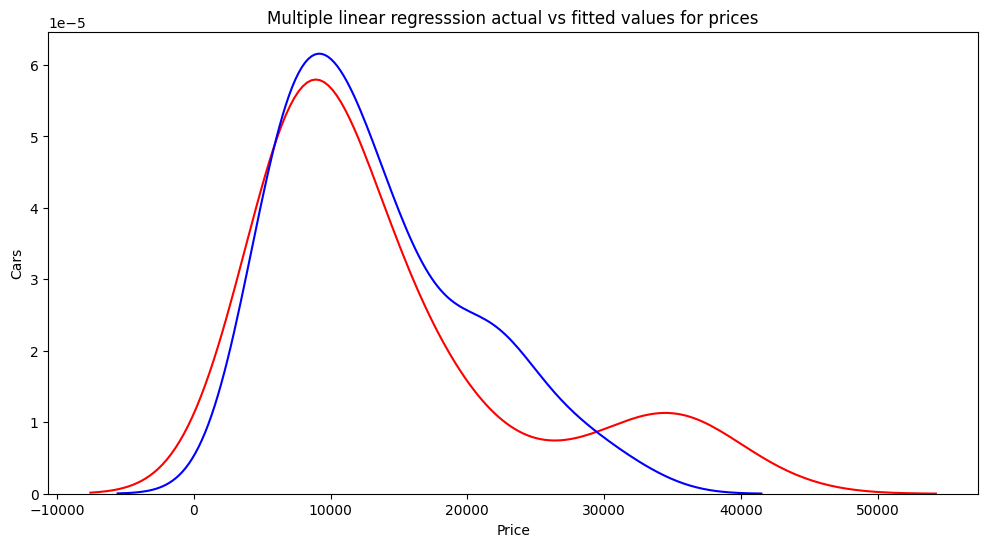

In [30]:
plt.figure(figsize=(12,6))
ax1 = sns.kdeplot(y_test,  color='r', label='Actual Price')
sns.kdeplot(y_hat,  color='b', label= ' Fitted Values',  ax=ax1)
plt.title("Multiple linear regresssion actual vs fitted values for prices")
plt.xlabel("Price")
plt.ylabel("Cars")
plt.show()
plt.close()

## Mean Square Error (MSE)

The Mean Square Error (MSE) is a common loss function used in regression problems to measure the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The MSE is always non-negative, and values closer to zero are better. The formula for calculating MSE is given by:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$ is the number of observations,
- $y_i$ is the actual value of the i-th observation,
- $\hat{y}_i$ is the predicted value for the i-th observation.


## Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a metric used to measure the average magnitude of the errors between pairs of predictions and actual outcomes, without considering their direction. It's the mean over the test sample of the absolute differences between predicted and actual values. MAE provides a straightforward indication of average error magnitude in the same units as the data. The MAE formula is:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

Where:
- $n$ is the number of observations,
- $y_i$ is the actual value for the i-th observation,
- $\hat{y}_i$ is the predicted value for the i-th observation.

MAE is particularly useful for understanding the average error magnitude directly in the output variable's units.



## Root Mean Square Error (RMSE)

The Root Mean Square Error (RMSE) is another metric used to measure the average magnitude of the error. It's the square root of the average of squared differences between the predicted values and actual values. Compared to MAE, RMSE gives a relatively high weight to large errors. This means RMSE is more sensitive to outliers than MAE. The RMSE formula is:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Where:
- $n$ is the number of observations,
- $y_i$ is the actual value of the i-th observation,
- $\hat{y}_i$ is the predicted value for the i-th observation.

RMSE is valuable when large errors are particularly undesirable and should be penalized more than smaller errors. It is also more appropriate than MAE when the error distribution is expected to be Gaussian.
